# Comparing prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonalised


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot') # styling

In [2]:
deseason = pd.read_csv(r"G:/SocialCops/Monthly_data_cmo_Deseasonalized.csv")
deseason["date"]=pd.to_datetime(deseason["date"])

In [6]:
mspr = pd.read_csv(r"G:/SocialCops/CMO_MSP_Mandi_Filtered.csv")
mspr = mspr[mspr['year'] != 2012]
mspr = mspr[mspr['year'] != 2013]
mspr["year"]=pd.to_datetime(mspr["year"], format= '%Y')
mspr.head()

,commodity,year,Type,msprice,msp_filter
58,paddyunhusked,2014-01-01,kharif crops,1360.0,1
59,ricepaddyhus,2014-01-01,kharif crops,1400.0,1
60,jowarhybrid,2014-01-01,kharif crops,1530.0,1
61,sorgumjawar,2014-01-01,kharif crops,1550.0,1
62,bajri,2014-01-01,kharif crops,1250.0,1


In [16]:
def compare_price(apmc, commodity):
    
    label = str(apmc)+':'+str(commodity)
    data_filter = deseason[deseason["combination_label"]==label]
    # If no such match found within our data due to:
    # 1. Insufficient MSP data
    # 2. Invalid apmc,commodity cluster
    # 3. Apmc, commodity group which has already been filtered out during pre processing
    if data_filter.shape[0] == 0: 
        return "Not enough data"
    
    msp = mspr[mspr['commodity'] == commodity]
    msp = msp[['year', 'msprice']]
    
    # Plotting (Dates on X axis)
    xaxis = pd.to_datetime(data_filter['date'])
    plt.figure(figsize=(9, 7))
    plt.plot(data_filter['date'], data_filter['modal_price'])
    plt.plot(data_filter['date'], data_filter['modal_price_deseasonalized'])
    plt.plot(msp['year'], msp['msprice'], color = 'y')
    #plt.plot(data_filter[])
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xticks(rotation=45)
    plt.legend(['Actual price', 'Deseasonalized', 'MSP'])
    plt.show()

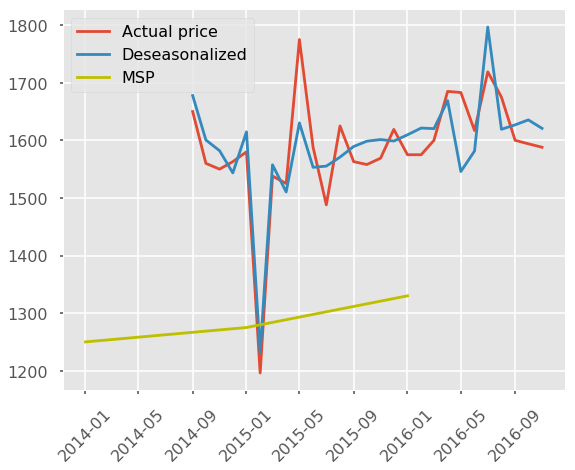

In [17]:
compare_price('akole','bajri')

From the above graph, we can infer that in February, 2015 the actual price of the commodity went below the minimum support price as set by the government.

In [18]:
compare_price('latur','wheathusked')

'Not enough data'

In [19]:
compare_price('latur','bajri')

'Not enough data'

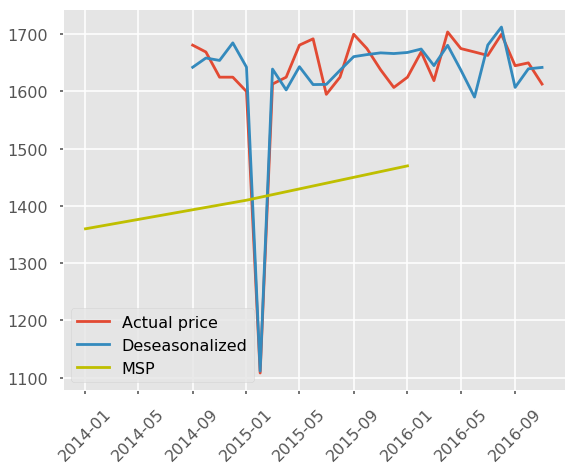

In [20]:
compare_price('akole','paddyunhusked')

Same is the case with this as above

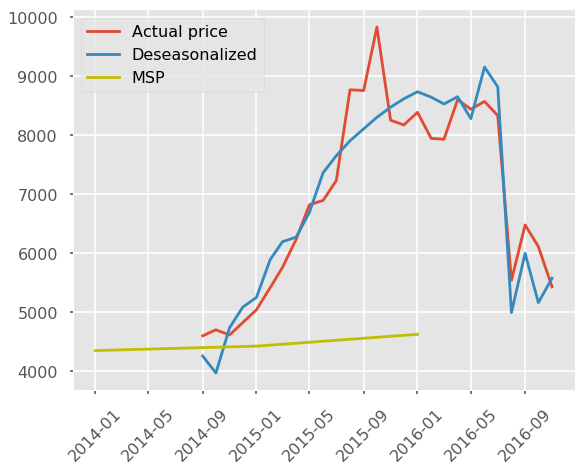

In [22]:
compare_price('yeotmal','pigeon pea tur')

Here, the actual price is always above the MSP but the deseasonlised price in October 2014 has gone below the MSP.